# Display image

GopherNotes provides "display" package which is automatically loaded to display various file types. 

```go
const (
	MIMETypeHTML       = "text/html"
	MIMETypeJavaScript = "application/javascript"
	MIMETypeJPEG       = "image/jpeg"
	MIMETypeJSON       = "application/json"
	MIMETypeLatex      = "text/latex"
	MIMETypeMarkdown   = "text/markdown"
	MIMETypePNG        = "image/png"
	MIMETypePDF        = "application/pdf"
	MIMETypeSVG        = "image/svg+xml"
)

// bundledMIMEData holds data that can be presented in multiple formats. The keys are MIME types
// and the values are the data formatted with respect to its MIME type. All bundles should contain
// at least a "text/plain" representation with a string value.
type BundledMIMEData map[string]interface{}

type Data struct {
	Data      BundledMIMEData
	Metadata  BundledMIMEData
	Transient BundledMIMEData
}

func HTML(html         string) Data
func JSON(json         map[string]interface{}) Data
func JavaScript(javascript string) Data
func JPEG(jpeg         []byte) Data
func Latex(latex       string) Data
func Markdown(markdown string) Data
func Math(latex        string) Data // LaTeX formula, without starting and ending '$$' 
func PDF(pdf           []byte) Data
func PNG(png           []byte) Data
func SVG(svg           string) Data

func MakeData(mimeType string, data interface{}) Data
func MakeData3(mimeType string, plaintext string, data interface{}) Data
func Bytes(mimeType string, bytes []byte) Data
func String(mimeType string, s string) Data
func MIME(data, metadata map[string]interface{}) Data

```

Source: https://notebook.community/gophergala2016/gophernotes/examples/Display

In [2]:
import (
    "fmt"
    "net/http"
    "io/ioutil"
)

func readImage(filepath string) []byte {
    bytes, err := ioutil.ReadFile(filepath)
    if err != nil { fmt.Println(err)}
    return bytes
}

func readImageURL(url string) []byte {
    resp, err := http.Get(url)
    bytes, err := ioutil.ReadAll(resp.Body)
    resp.Body.Close()
    return bytes
}

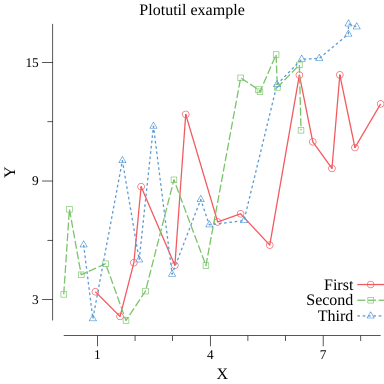

In [3]:
display.PNG(readImage("points.png"))

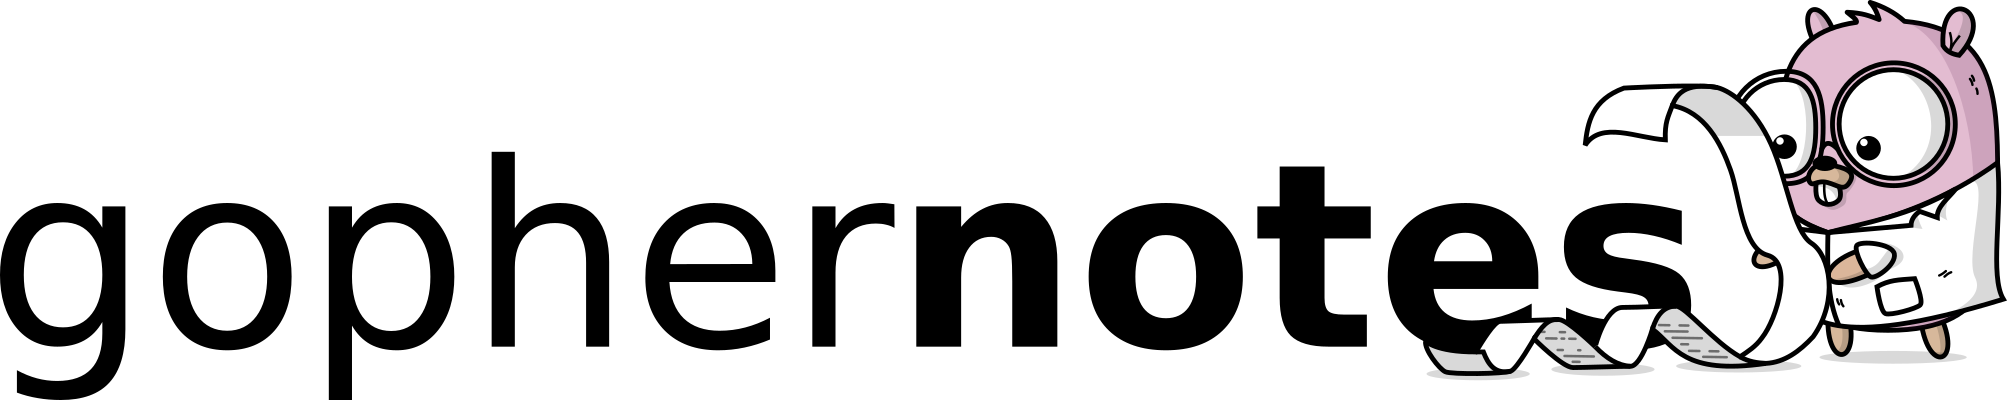

In [5]:
display.PNG(readImageURL("https://github.com/gopherdata/gophernotes/raw/master/files/gophernotes-logo.png"))

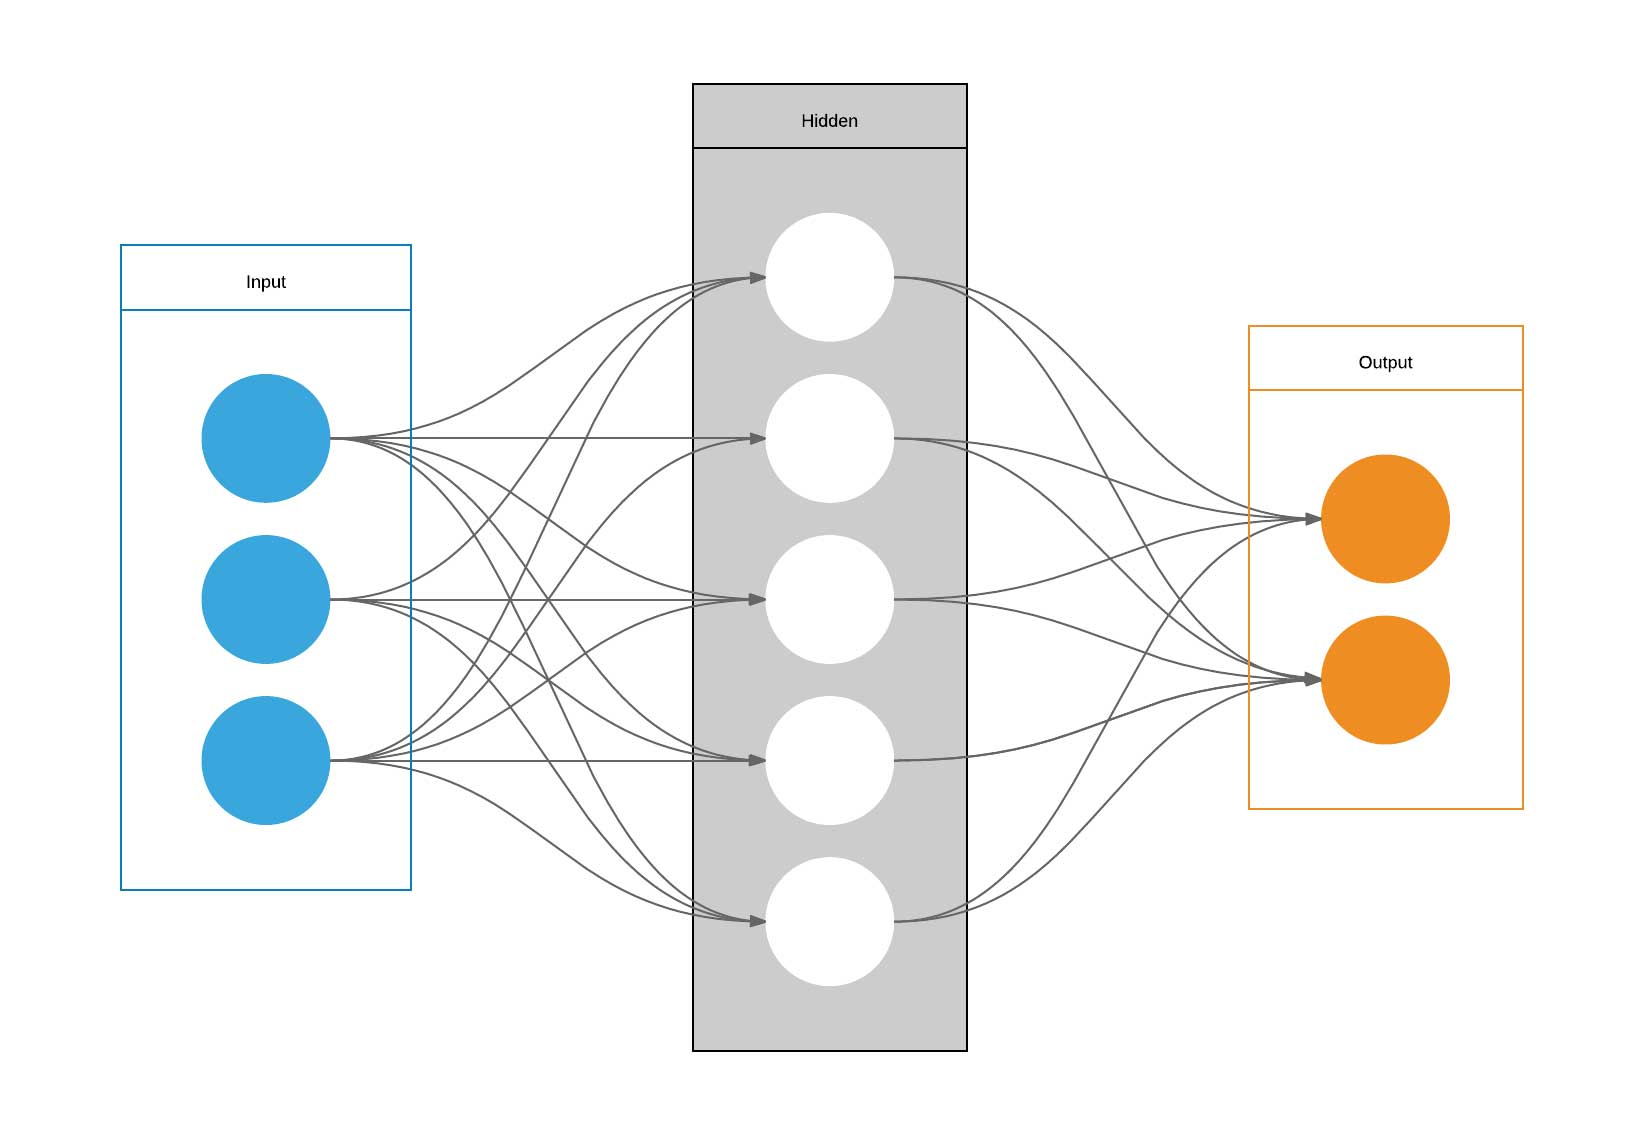

In [7]:
display.JPEG(readImageURL("https://upload.wikimedia.org/wikipedia/commons/1/1e/Artificial_Neural_Network.jpg"))